# Using Intel Geti SDK: Data ingestion, Exported Model, Testing Deployment
In this notebook, we will upload a video taken by the webcam to an specific project on the platform, verify the data in the GUI, download the new model and run the deployment using the the Intel Geti exportable code. 

# SDK use

The Intel® Geti™ SDK is a python package which contains tools to interact with an Intel® Geti™ server via the REST API. It provides functionality for:

- Project creation from annotated datasets on disk
- Project downloading (images, videos, configuration, annotations, predictions and models)
- Project creation and upload from a previous download
- Deploying a project for local inference with OpenVINO
- Getting and setting project and model configuration
- Launching and monitoring training jobs
- Media upload and prediction

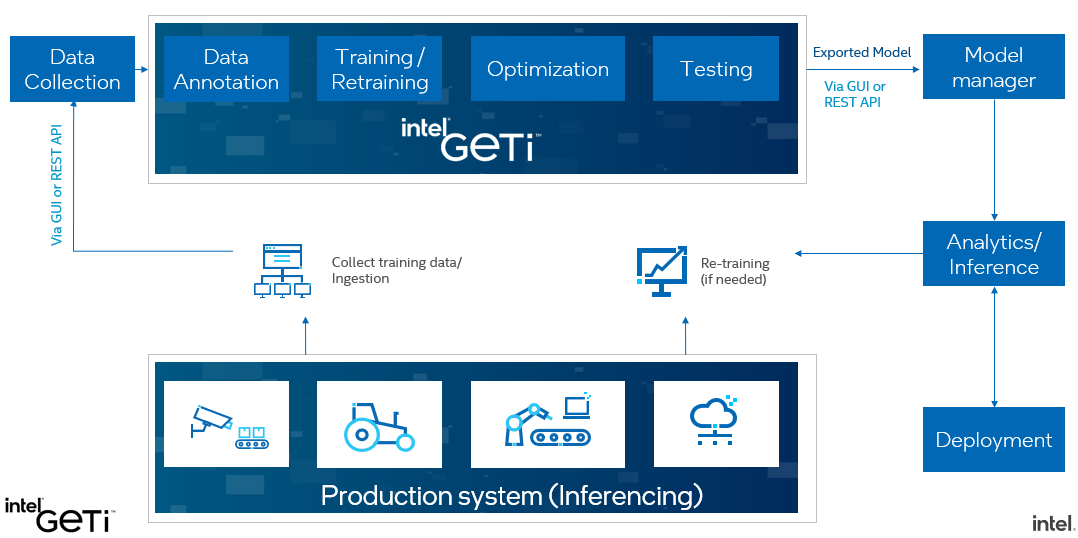

# How to digest new production data into the Intel Geti platform?

In this case we will use a webcam video, you can ***CHALLENGE TO THE AUDIENCE*** (for example: Where is my apple? Where is my cup? Simple Challenges to the audiences. The goal here is to push different acquisition conditions, lighting, camera, backgrounds, to show how flexible is the platform and how eficient will be the models. 

- Open GUI and check the platform before running this notebook
- Record the video
- Upload the video to Intel Geti platform
- Open the GUI
- Edit annotation with this new video (Show this)
- Download the deployment (active model)

# Uploading a video to the platform, and requesting a prediction for it
In this notebook, we will upload a single numpy image to a specific project on the platform, and make a request to get a prediction for it

In [1]:
# As usual we will connect to the platform first, using the server details from the .env file

from geti_sdk import Geti
from geti_sdk.utils import get_server_details_from_env

hostname, authentication_info = get_server_details_from_env()

geti = Geti(host=hostname, **authentication_info)

C:\Intel\GitHub\geti-sdk\geti_sdk\http_session\geti_session.py:71: InsecureRequestWarning: You have disabled TLS certificate validation, HTTPS requests made to the Intel® Geti™ server may be compromised. For optimal security, please enable certificate validation.
  warnings.warn(


2022-12-07 15:54:18,611 - INFO - Personal access token validated on host https://10.91.120.185


### Setting up the project client, video client and prediction client
In this notebook, we will need three client objects: A ProjectClient to retrieve the project we want to upload to, an VideoClient to be able to upload the image and a PredictionClient to request and receive the prediction for the image. We first set up the ProjectClient, since we will need to get the project we are interested in before we can initialize the other two clients.

In [2]:
from geti_sdk.rest_clients import ImageClient, PredictionClient, ProjectClient

project_client = ProjectClient(session=geti.session, workspace_id=geti.workspace_id)

Now that the project client is set up, we need to specify the project we would like to upload to. We will use the `where_is_my_apple demo`

In [3]:
projects = project_client.list_projects()

5 projects were found on the platform:

 Project: AMR Detection in Warehouse - trained
  Task 1: Detection task
    Labels: ['AMR', 'No Object']


 Project: AMR Detection in Warehouse - untrained
  Task 1: Detection task
    Labels: ['AMR', 'No Object']


 Project: Bolts Segmentation - Anomaly
  Task 1: Anomaly segmentation task
    Labels: ['Normal', 'Anomalous']


 Project: bolt_detection
  Task 1: Detection task
    Labels: ['good', 'bad', 'No Object']


 Project: Weed Det-Class upload
  Task 1: Detection task
    Labels: ['pot', 'No Object']
  Task 2: Classification task
    Labels: ['broadleaf', 'grass', 'clover']




In [4]:
PROJECT_NAME = "bolt_detection"

With the project name specified, we can retrieve the project details from the project client and use the returned `Project` object to set up an `video_client` and `prediction_client` for this project.

In [5]:
project = project_client.get_project_by_name(PROJECT_NAME)
image_client = ImageClient(
    session=geti.session, workspace_id=geti.workspace_id, project=project
)
prediction_client = PredictionClient(
    session=geti.session, workspace_id=geti.workspace_id, project=project
)

## Uploading an video
The SDK contains an example image that we can grab and upload to the project. The path to the image is in the `EXAMPLE_IMAGE_PATH` constant, from the `geti_sdk.demos` module. We can upload the image directly from file using the `image_client.upload_image()` method. Before uploading, we can get a list of all images in the project, so that we can verify that the image was uploaded successfully

In [10]:
videos = video_client.get_all_videos()
print(f"Project '{project.name}' contains {len(videos)} videos.")

NameError: name 'video_client' is not defined

Now, we will upload the example image from the SDK. Of course, you can replace the `EXAMPLE_IMAGE_PATH` with a path to one of your own images as well.

In [ ]:
VIDEO_PATH = "C:/Users/paularam/OneDrive - Intel Corporation/Pictures/Camera Roll/WIN_20221024_08_18_26_Pro.mp4"

#from geti_sdk.demos import VIDEO_PATH

video = video_client.upload_video(video=VIDEO_PATH)

Let's fetch the list of images again and see if it has changed

In [ ]:
videos = video_client.get_all_videos()
print(f"Project '{project.name}' contains {len(videos)} images.")

## Go to the GUI to see/edit the annotations
Once you upload the new production data, you should open the GUI and check, approve or edit the annotations. When the model is ready you can download the deployment and run it locally or run the inference in the platform. In this example we will download the deployment and run it locally.

## Download the model and run de deployment locally
Before deploying, we need to make sure that the project is trained. Otherwise it will not contain any models to deploy, and the deployment will fail.

In [7]:
from geti_sdk.demos import ensure_trained_example_project

ensure_trained_example_project(geti=geti, project_name=PROJECT_NAME);


Project 'Counting coffee fruits - trained' is ready to predict.



Once we are sure that the project has trained models for each task, we can create the deployment in the cell below.

In [8]:
deployment = geti.deploy_project(project_name=PROJECT_NAME)

2022-11-01 16:35:14,942 - INFO - Retrieving MO model data for Instance segmentation task...


## Saving the deployment
When we create the deployment, the model data is saved to a temporary folder. We store the deployment for offline re-use later on by saving it: This will copy the model data from the temporary folder to the path we specify. If we want to run inference locally again, we can simply reload the deployment from the saved folder, without having to connect to the platform again.

In [9]:
import os

PATH_TO_DEPLOYMENT_FOLDER = os.path.join("deployments", PROJECT_NAME)

deployment.save(path_to_folder=PATH_TO_DEPLOYMENT_FOLDER)

## Run the deployment using a webcam

## Where is my apple?

This notebook demostrate the interaction with Intel Geti GUI, Intel Geti SDK and OpenVINO. ...

<div>
<img src="attachment:4b98ab5b-9f82-4d8d-a868-f5d93c6e6ef7.png" width="200"/>
</div>

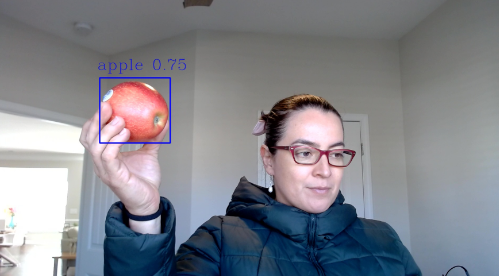


## YoloX-tiny model implemented from Intel Geti to OpenVINO

## Use Case and High-Level Description

The `yolox-tiny` is a tiny version of YOLOX models family for object detection tasks. YOLOX is an anchor-free version of YOLO, with a simpler design but better performance.This model was pre-trained on [Common Objects in Context (COCO)](https://cocodataset.org/#home) dataset with 80 classes.

More details provided in the [paper](https://arxiv.org/abs/2107.08430) and [repository](https://github.com/openvinotoolkit/open_model_zoo/blob/master/models/public/yolox-tiny/README.md).

## Input 
Image, name - `images`, shape - `1, 3, 416, 416`, format - `B, C, H, W`, where:

- `B` - batch size
- `C` - number of channels
- `H` - image height
- `W` - image width

Expected color order - `BGR`.

## Output
The array of detection summary info, name - `output`,  shape - `1, 3549, 85`, format is `B, N, 85`, where:

- `B` - batch size
- `N` - number of detection boxes

Detection box has format [`xmin`, `ymin`, `xmax`, `ymax`, `box_score`, `class_no_1`, ..., `class_no_80`], where:

- (`xmin`, `ymin`) - raw coordinates of top left corner
- (`xmax`, `ymax`) - raw coordinates of botton right corner
- `box_score` - confidence of detection box
- `class_no_1`, ..., `class_no_80` - probability distribution over the classes in logits format. 

The number of classes will change depending of the model and the postprocessing code should be modified depending of the number of classes

### Imports

In [7]:
from openvino.runtime import Core
import matplotlib
from PIL import Image
import numpy as np
import json
import cv2
import sys

import collections
import os
import time

from IPython import display

sys.path.append("./utils")
import notebook_utils as utils

### Check devices

In [22]:
ie = Core()
devices = ie.available_devices
for device in devices:
    device_name = ie.get_property(device_name=device, property="FULL_DEVICE_NAME")
    print(f"{device}: {device_name}")


CPU: Intel(R) Core(TM) i7-10610U CPU @ 1.80GHz
GPU: Intel(R) UHD Graphics (iGPU)


### Load model

Downloaded models are located in a fixed structure, which indicates a vendor (intel or public), the name of the model and a precision.

Only a few lines of code are required to run the model. First, initialize OpenVINO Runtime. Then, read the network architecture and model weights from the `.bin` and `.xml` files to compile for the desired device. If you choose `GPU` you need to wait for a while, as the startup time is much longer than in the case of `CPU`.

There is a possibility to allow OpenVINO to decide which hardware offers the best performance. In that case, just use `AUTO`. Remember that for most cases the best hardware is `GPU` (better performance, but longer startup time).

In [15]:
#converted_model_path = "C:\Intel\GitHub\inferencing_data\yolox\model\model.xml"
converted_model_path = "C:/Intel/GitHub/geti-sdk/notebooks/deployments/where_is_my_apple/deployment/Detection task/model/model.xml"
#ir_path = f'{data_dir}{ir_path}'
#ir_path

# Initialize OpenVINO Runtime.
ie_core = Core()
# Read the network and corresponding weights from a file.
model = ie_core.read_model(model=converted_model_path)
# Compile the model for CPU (you can choose manually CPU, GPU, MYRIAD etc.)
# or let the engine choose the best available device (AUTO).
compiled_model = ie_core.compile_model(model=model, device_name="CPU")

# Get the input and output nodes.
input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)

# Get the input size.
height, width = list(input_layer.shape)[2:]

In [16]:
# checking input tensor
print(input_layer)
print(height, width)

<ConstOutput: names[image] shape{1,3,416,416} type: f32>
416 416


In [17]:
# checking model node names
input_layer.any_name, output_layer.any_name

('image', 'boxes')

## Processing

### Process Results

First, list all available classes and create colors for them. Then, in the post-process stage, transform boxes with normalized coordinates `[0, 1]` into boxes with pixel coordinates `[0, image_size_in_px]`. Finally, draw boxes and labels inside them.

In [18]:
# Uniwue category in this case "Apple"
classes = [
    "apple"
]

# Colors for the classes above (Rainbow Color Map).
colors = cv2.applyColorMap(
    src=np.arange(0, 255, 255 / len(classes), dtype=np.float32).astype(np.uint8),
    colormap=cv2.COLORMAP_RAINBOW,
).squeeze()

def process_results(frame, results, thresh=0.6):
    # The size of the original frame.
    h, w = frame.shape[:2]
    #print(h,w)
    # The 'results' variable is a [1, 1, 100, 7] tensor.
    results = results.squeeze()
    boxes = []
    #labels = []
    scores = []
    for xmin, ymin, xmax, ymax, score in results:
        # Create a box with pixels coordinates from the box with normalized coordinates [0,1].
        #print(boxX, boxY, boxH, boxW)
        boxes.append(
            tuple(map(int, (xmin, ymin, xmax, ymax)))
            #tuple(map(int, (xmin * w, ymin * h, (xmax - xmin) * w, (ymax - ymin) * h)))
            #tuple(map(int, ((boxX-boxW/2) * w, (boxY-boxH/2) * h, ((boxX+boxW/2) - (boxX-boxW/2)) * w, ((boxY+boxH/2) - (boxY-boxH/2)) * h)))
        )
        #green dot = boxXY - boxWH / 2
        #purple dot = boxXY + boxWH /2
        #labels.append(int(label))
        scores.append(float(score))

    # Apply non-maximum suppression to get rid of many overlapping entities.
    # See https://paperswithcode.com/method/non-maximum-suppression
    # This algorithm returns indices of objects to keep.
    indices = cv2.dnn.NMSBoxes(
        bboxes=boxes, scores=scores, score_threshold=thresh, nms_threshold=0.6
    )

    # If there are no boxes.
    if len(indices) == 0:
        return []

    # Filter detected objects.
    return [(scores[idx], boxes[idx]) for idx in indices.flatten()]

def draw_boxes(frame, boxes):
    h, w = frame.shape[:2]
    #print(h,w)
    xscale = w/width
    yscale = h/height 
    #print(xscale, yscale)
    for score, box in boxes:
        # Choose color for the label.
        #color = tuple(map(int, colors[label]))
        print(box)
        # Draw a box.
        #x2 = box[0] + box[2]
        #y2 = box[1] + box[3]
        #print(box[:2])#, (x2, y2))
        #print(box[2:])
        cv2.rectangle(img=frame, pt1=(int(box[0]*xscale), int(box[1]*yscale)), pt2=(int(box[2]*xscale), int(box[3]*yscale)), color=(255,0,0), thickness=3)

        # Draw a label name inside the box.
        cv2.putText(
            img=frame,
            text=f"here is! {score:.2f}",
            org=(int(box[0]*xscale) - 10, int(box[1]*yscale) - 30),
            fontFace=cv2.FONT_HERSHEY_COMPLEX,
            fontScale=frame.shape[1] / 1000,
            color=(255,0,0),
            thickness=1,
            lineType=cv2.LINE_AA,
        )

    return frame

### Main Processing Function

Run object detection on the specified source. Either a webcam or a video file.

In [19]:
# Main processing function to run object detection.
def run_object_detection(source=0, flip=False, use_popup=False, skip_first_frames=0):
    player = None
    try:
        # Create a video player to play with target fps.
        player = utils.VideoPlayer(
            source=source, flip=flip, fps=30, skip_first_frames=skip_first_frames
        )
        # Start capturing.
        player.start()
        if use_popup:
            title = "Press ESC to Exit"
            cv2.namedWindow(
                winname=title, flags=cv2.WINDOW_GUI_NORMAL | cv2.WINDOW_AUTOSIZE
            )

        processing_times = collections.deque()
        while True:
            # Grab the frame.
            frame = player.next()
            if frame is None:
                print("Source ended")
                break
            # If the frame is larger than full HD, reduce size to improve the performance.
            scale = 1280 / max(frame.shape)
            if scale < 1:
                frame = cv2.resize(
                    src=frame,
                    dsize=None,
                    fx=scale,
                    fy=scale,
                    interpolation=cv2.INTER_AREA,
                )
            
           

            # Resize the image and change dims to fit neural network input.
            #input_img = cv2.resize(
            #    src=frame, dsize=(width, height), interpolation=cv2.INTER_AREA
            #)
            resized_image = cv2.resize(src=frame, dsize=(width, height))#, interpolation=cv2.INTER_AREA)
            #print("Resized image", resized_image.shape)
            input_image = np.expand_dims(np.transpose(resized_image, (2, 0, 1)), 0)
            #print("input_image", input_image.shape)
            
            # Create a batch of images (size = 1).
            #input_img = input_img[np.newaxis, ...]

            # Measure processing time.

            start_time = time.time()
            # Get the results.
            results = compiled_model([input_image])[output_layer]
            stop_time = time.time()
            # Get poses from network results.
            boxes = process_results(frame=input_image, results=results)

            # Draw boxes on a frame.
            frame = draw_boxes(frame=frame, boxes=boxes)

            processing_times.append(stop_time - start_time)
            # Use processing times from last 200 frames.
            if len(processing_times) > 200:
                processing_times.popleft()

            _, f_width = frame.shape[:2]
            # Mean processing time [ms].
            processing_time = np.mean(processing_times) * 1000
            fps = 1000 / processing_time
            cv2.putText(
                img=frame,
                text=f"Inference time: {processing_time:.1f}ms ({fps:.1f} FPS)",
                org=(20, 40),
                fontFace=cv2.FONT_HERSHEY_COMPLEX,
                fontScale=f_width / 1000,
                color=(0, 0, 255),
                thickness=1,
                lineType=cv2.LINE_AA,
            )

            # Use this workaround if there is flickering.
            if use_popup:
                cv2.imshow(winname=title, mat=frame)
                key = cv2.waitKey(1)
                # escape = 27
                if key == 27:
                    break
            else:
                # Encode numpy array to jpg.
                _, encoded_img = cv2.imencode(
                    ext=".jpg", img=frame, params=[cv2.IMWRITE_JPEG_QUALITY, 100]
                )
                # Create an IPython image.
                i = display.Image(data=encoded_img)
                # Display the image in this notebook.
                display.clear_output(wait=True)
                display.display(i)
    # ctrl-c
    except KeyboardInterrupt:
        print("Interrupted")
    # any different error
    except RuntimeError as e:
        print(e)
    finally:
        if player is not None:
            # Stop capturing.
            player.stop()
        if use_popup:
            cv2.destroyAllWindows()

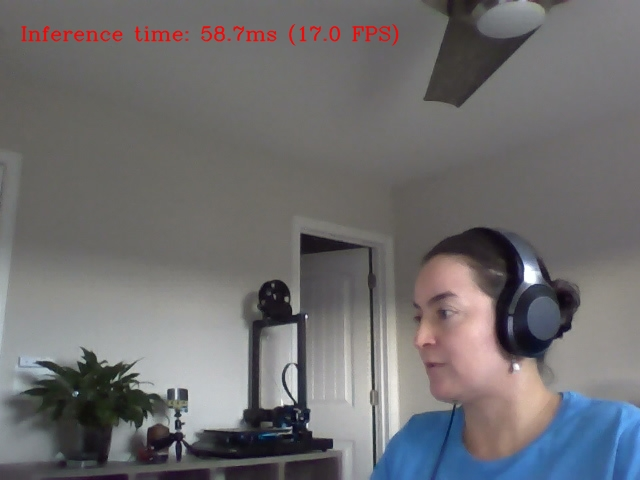

Interrupted


In [20]:
run_object_detection(source=0, flip=True, use_popup=False)

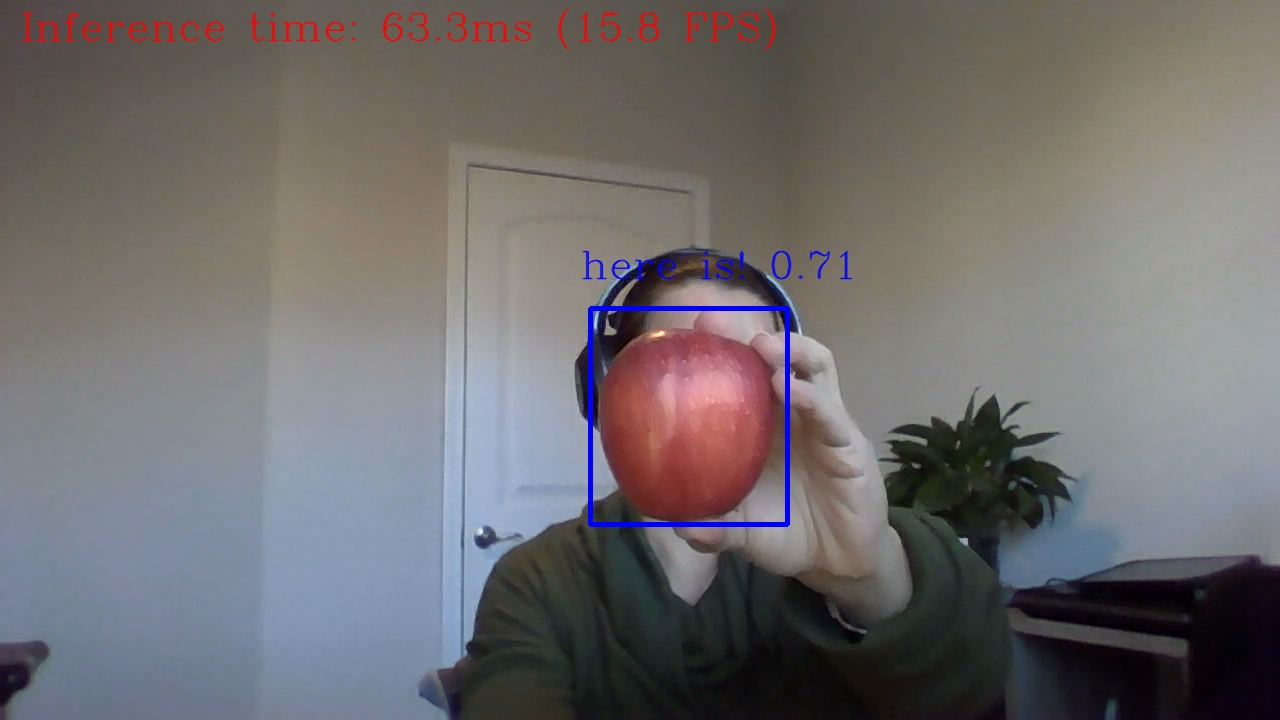

Source ended


In [21]:
video_file = "C:/Users/paularam/OneDrive - Intel Corporation/Pictures/Camera Roll/WIN_20221024_08_18_26_Pro.mp4"

run_object_detection(source=video_file, flip=False, use_popup=False)